In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
def RMSE(Y, Y_pred):
    Y, Y_pred = np.array(Y), np.array(Y_pred)
    error = (Y_pred - Y)**2
    return np.mean(error) ** 0.5

def MSE(Y, Y_pred):
    Y, Y_pred = np.array(Y), np.array(Y_pred)
    error = (Y_pred - Y)**2
    return np.mean(error)

def error(Y, Y_pred):
    Y, Y_pred = np.array(Y), np.array(Y_pred)
    return np.mean(Y_pred - Y)

In [27]:
class MultipleLinearRegressionCalculus:
    def __init__(self):
        self.coefficients = None

    def fit(self, X, Y):
        X = np.array(X)
        Y = np.array(Y)

        X_ = np.hstack((np.ones((X.shape[0], 1)), X))

        XT_X = X_.T @ X_
        XT_Y = X_.T @ Y

        self.coefficients = np.linalg.inv(XT_X) @ XT_Y

    def predict(self, X):
        X = np.array(X)
        X_ = np.hstack((np.ones((X.shape[0], 1)), X))
        return X_ @ self.coefficients


In [28]:
df = pd.read_csv('datasets/sampledata2.csv')
df.drop(['Group'], axis='columns', inplace=True)

In [29]:
X = df.drop('Infarc', axis='columns')
Y = df['Infarc']

In [30]:
model = MultipleLinearRegressionCalculus()
model.fit(X, Y)
Y_pred = model.predict(X)
print(f"Coefficients of Polynomial Regression are {','.join(map(str, model.coefficients))}")
print(f"Multiple Linear Regression:")
print("    Error:", error(Y, Y_pred))
print("    MSE:", MSE(Y, Y_pred))
print("    RMSE:", RMSE(Y, Y_pred))

Coefficients of Polynomial Regression are -0.13453637823601383,0.6126549752681978,-0.2434822333958203,-0.06565569473887134
Multiple Linear Regression:
    Error: 9.020562075079397e-17
    MSE: 0.017028422624564204
    RMSE: 0.13049299837372197


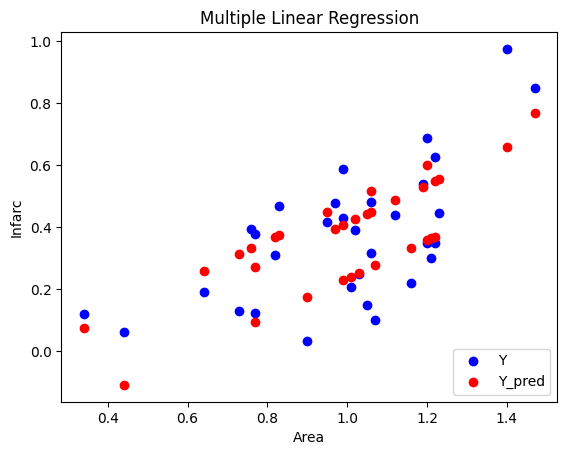

In [31]:
plt.scatter(X['Area'], Y, c='blue', label='Y')
plt.scatter(X['Area'], Y_pred, c='red', label='Y_pred')
plt.legend(loc='lower right')
plt.title('Multiple Linear Regression')
plt.xlabel('Area')
plt.ylabel('Infarc')

plt.show()